In [1]:
# System
from time import time

# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.contrib.missing import MissingValuesBar

%matplotlib inline

# Modeling
from pycaret.classification import *

C:\Users\Nikhil\.conda\envs\ds7337_cs3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv("../../data/final_project.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [3]:
features = data.columns[pd.Series(data.columns).str.startswith('x')].to_list()
target = data.columns[pd.Series(data.columns).str.startswith('y')].to_list()
print(f"Features: Length: {len(features)}, Values: {features} ")
print(f"Target: {target}")

Features: Length: 50, Values: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'] 
Target: ['y']


In [4]:
for feature in data[features].select_dtypes('object').columns:
    print(f"\nFeature: {feature}")
    print(data[feature].value_counts())


Feature: x24
asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

Feature: x29
July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

Feature: x30
wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

Feature: x32
0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

Feature: x37
$-311.26     6
$-336.77     6
$72.42       6
$-415.46     6
$618.22      6
            ..
$-1187.16    1
$819.86      1
$-825.07     1
$-1457.28    1
$240.01      1
Name: x37, Length: 129198, dtype: int64


In [5]:
data['x32'].replace(to_replace="%$", value="", regex=True, inplace=True)
data['x32'] = data['x32'].astype(float)

In [6]:
data['x37'].replace(to_replace="^\$", value="", regex=True, inplace=True)
data['x37'] = data['x37'].astype(float)

In [7]:
features_categorical = data[features].select_dtypes('object').columns
features_numerical = [feature for feature in features if feature not in features_categorical]

print(f"Features Categorical: Length: {len(features_categorical)}, Values: {features_categorical} ")
print(f"Features Numeric: Length: {len(features_numerical)}, Values: {features_numerical} ")

Features Categorical: Length: 3, Values: Index(['x24', 'x29', 'x30'], dtype='object') 
Features Numeric: Length: 47, Values: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'] 


## Missing Values

In [8]:
# # Instantiate the visualizer
# plt.figure(figsize=(15,10))
# visualizer = MissingValuesBar(features=features)

# visualizer.fit(X=data[features], y=data[target].values) # Supply the targets via y
# _ = visualizer.show() # Finalize and render the figure

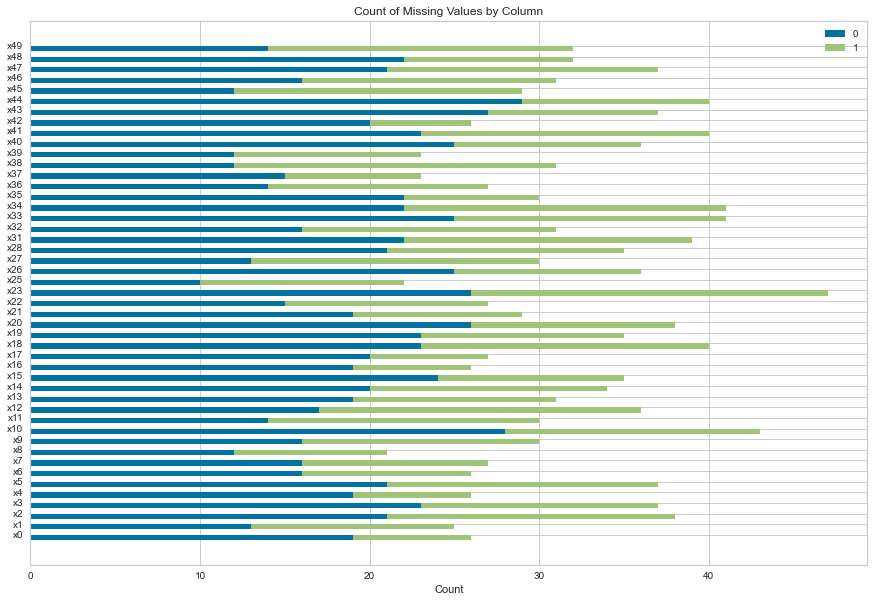

In [9]:
# Instantiate the visualizer
plt.figure(figsize=(15,10))
visualizer = MissingValuesBar(features=features_numerical)

visualizer.fit(X=data[features_numerical], y=data[target].values) # Supply the targets via y
_ = visualizer.show() # Finalize and render the figure

In [10]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

## Correlations

### Feature Correlations

<AxesSubplot:>

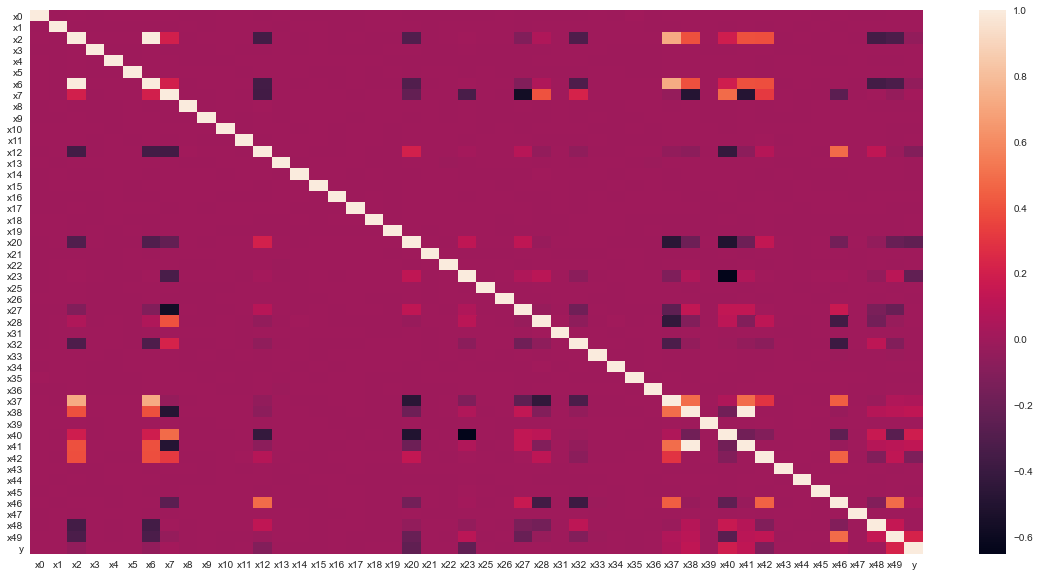

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr())

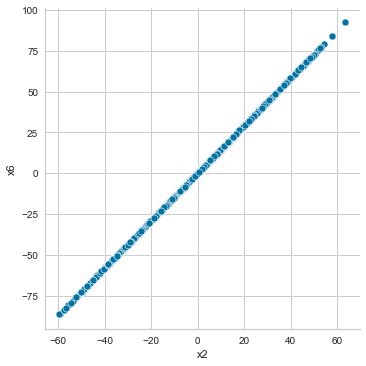

In [12]:
sns.relplot(x='x2', y = 'x6', data=data)

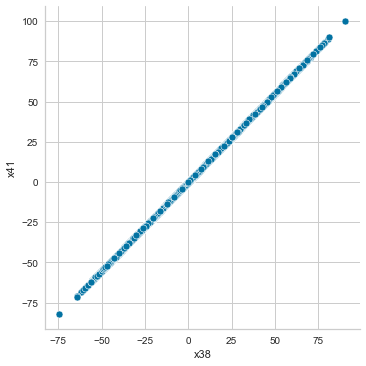

In [13]:
sns.relplot(x='x38', y = 'x41', data=data)

In [14]:
data.drop(columns=['x2', 'x6'], inplace=True)

In [15]:
features = data.columns[pd.Series(data.columns).str.startswith('x')].to_list()
features_categorical = data[features].select_dtypes('object').columns
features_numerical = [feature for feature in features if feature not in features_categorical]

print(f"Features Categorical: Length: {len(features_categorical)}, Values: {features_categorical} ")
print(f"Features Numeric: Length: {len(features_numerical)}, Values: {features_numerical} ")

Features Categorical: Length: 3, Values: Index(['x24', 'x29', 'x30'], dtype='object') 
Features Numeric: Length: 45, Values: ['x0', 'x1', 'x3', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'] 


### Correlations to Target

Relation to target variable seems to be weak at best. But this may not be the right way to visualize. We should do histograms faceted by target

In [16]:
np.abs(data.corr()['y']).sort_values(ascending=False)

y      1.000000
x20    0.241660
x23    0.237010
x49    0.222356
x40    0.191780
x42    0.124892
x41    0.122538
x38    0.122538
x12    0.106962
x37    0.054629
x46    0.040904
x7     0.014671
x8     0.006446
x32    0.005654
x34    0.005198
x16    0.004468
x17    0.004135
x27    0.003836
x10    0.003481
x1     0.003381
x48    0.003198
x45    0.003114
x21    0.003075
x18    0.002833
x9     0.002749
x39    0.002341
x35    0.002246
x26    0.001995
x13    0.001935
x3     0.001870
x25    0.001870
x19    0.001670
x15    0.001599
x0     0.001581
x33    0.001529
x31    0.001499
x36    0.001453
x4     0.001050
x5     0.000966
x11    0.000786
x14    0.000780
x28    0.000632
x47    0.000542
x22    0.000127
x44    0.000121
x43    0.000088
Name: y, dtype: float64

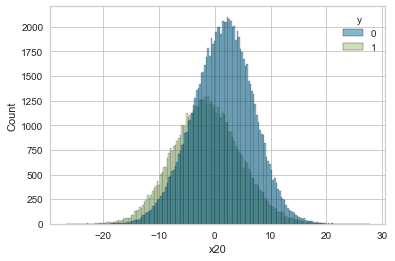

In [17]:
_ = sns.histplot(data=data, x="x20", hue="y")

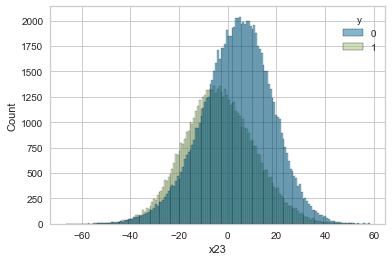

In [18]:
_ = sns.histplot(data=data, x="x23", hue="y")

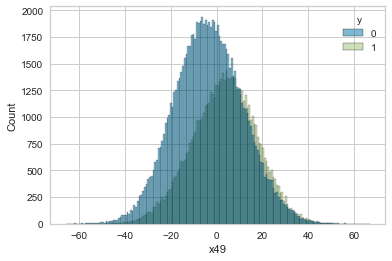

In [19]:
_ = sns.histplot(data=data, x="x49", hue="y")

## Modeling

https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb

In [20]:
X = data[features]
y = data[target]

print(X.shape, y.shape)

(158392, 48) (158392, 1)


In [21]:
train = data.sample(frac=0.80, random_state=42)
test = data.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

Data for Modeling: (126714, 49)
Unseen Data For Predictions: (31678, 49)


### Setup

In [22]:
exp_01 = setup(
    data=train,
    target='y',
    train_size=0.8,
    data_split_stratify=True,
    fold=3,
    session_id=42,
    log_experiment=True,
    use_gpu=True
)

# Polynomial Features
# Feature Selection?
# combine_rare_levels
# pca

,Description,Value
0,session_id,42
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(126714, 49)"
5,Missing Values,False
6,Numeric Features,45
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


### Custom Metric

In [23]:
# check all metrics used for model evaluation
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000002F871F708B8>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x000002F871F5DC18>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000002F871F70...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000002F871F76...,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [24]:
def single_instance_metric(row):
    if row['y_test'] == 0 and row['y_pred'] == 1: # False Positive
        return 10
    elif row['y_test'] == 1 and row['y_pred'] == 0: # False Negative
        return 500
    else: # Correct Predictions
        return 0

def fp10_fn500_func(y_test, y_pred):
    df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
    df['metric'] = df.apply(single_instance_metric, axis=1)
    return np.mean(df['metric'].values)

In [25]:
y_true = [1, 0, 1]
y_pred = [0, 0, 1]
fp10_fn500_func(y_true, y_pred)

166.66666666666666

In [26]:
add_metric(
    id='fp10_fn500',
    name='fp10_fn500',
    score_func=fp10_fn500_func,
    target='pred',
    greater_is_better=False)

Name                                                        fp10_fn500
Display Name                                                fp10_fn500
Score Function        <function fp10_fn500_func at 0x000002F806A1FC18>
Scorer               make_scorer(fp10_fn500_func, greater_is_better...
Target                                                            pred
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: fp10_fn500, dtype: object

In [27]:
# remove_metric('fp10_fn500')

In [28]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000002F871F708B8>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x000002F871F5DC18>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<function binary_multiclass_score_func.<locals...,"make_scorer(wrapper, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000002F871F70...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000002F871F76...,make_scorer(matthews_corrcoef),pred,{},True,True,False
fp10_fn500,fp10_fn500,fp10_fn500,<function fp10_fn500_func at 0x000002F806A1FC18>,"make_scorer(fp10_fn500_func, greater_is_better...",pred,{},False,True,True


### Baseline Model

In [29]:
start = time()
best_model = compare_models(
    sort='fp10_fn500',
    exclude = ['gbc'] # Slow Model(s)
)
end = time()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fp10_fn500,TT (Sec)
catboost,CatBoost Classifier,0.9252,0.9758,0.8939,0.9178,0.9057,0.8438,0.8440,21.6196,15.5067
xgboost,Extreme Gradient Boosting,0.9213,0.9740,0.8887,0.9130,0.9007,0.8356,0.8358,22.6837,4.7800
lightgbm,Light Gradient Boosting Machine,0.9064,0.9660,0.8595,0.9028,0.8806,0.8037,0.8044,28.5896,2.6133
rf,Random Forest Classifier,0.9114,0.9687,0.8483,0.9249,0.8850,0.8132,0.8152,30.7290,17.5600
et,Extra Trees Classifier,0.8995,0.9651,0.8132,0.9277,0.8667,0.7866,0.7910,37.7556,13.7067
dt,Decision Tree Classifier,0.8322,0.8258,0.7930,0.7900,0.7915,0.6511,0.6511,42.4117,8.3633
knn,K Neighbors Classifier,0.8015,0.8670,0.7387,0.7601,0.7493,0.5850,0.5852,53.3970,13.3333
ada,Ada Boost Classifier,0.7355,0.7977,0.5973,0.7000,0.6446,0.4360,0.4395,81.8942,28.3700
nb,Naive Bayes,0.6866,0.7358,0.5874,0.6149,0.6008,0.3431,0.3433,84.3262,1.0167
lr,Logistic Regression,0.7031,0.7597,0.5185,0.6679,0.5838,0.3586,0.3656,97.7202,10.4533


In [30]:
print(f"Training Time: {end-start}s")

Training Time: 412.8850984573364s


In [31]:
# pull the score grid of compare_models as a dataframe
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fp10_fn500,TT (Sec)
catboost,CatBoost Classifier,0.9252,0.9758,0.8939,0.9178,0.9057,0.8438,0.8440,21.6196,15.5067
xgboost,Extreme Gradient Boosting,0.9213,0.9740,0.8887,0.9130,0.9007,0.8356,0.8358,22.6837,4.7800
lightgbm,Light Gradient Boosting Machine,0.9064,0.9660,0.8595,0.9028,0.8806,0.8037,0.8044,28.5896,2.6133
rf,Random Forest Classifier,0.9114,0.9687,0.8483,0.9249,0.8850,0.8132,0.8152,30.7290,17.5600
et,Extra Trees Classifier,0.8995,0.9651,0.8132,0.9277,0.8667,0.7866,0.7910,37.7556,13.7067
dt,Decision Tree Classifier,0.8322,0.8258,0.7930,0.7900,0.7915,0.6511,0.6511,42.4117,8.3633
knn,K Neighbors Classifier,0.8015,0.8670,0.7387,0.7601,0.7493,0.5850,0.5852,53.3970,13.3333
ada,Ada Boost Classifier,0.7355,0.7977,0.5973,0.7000,0.6446,0.4360,0.4395,81.8942,28.3700
nb,Naive Bayes,0.6866,0.7358,0.5874,0.6149,0.6008,0.3431,0.3433,84.3262,1.0167
lr,Logistic Regression,0.7031,0.7597,0.5185,0.6679,0.5838,0.3586,0.3656,97.7202,10.4533


In [32]:
print(best_model)

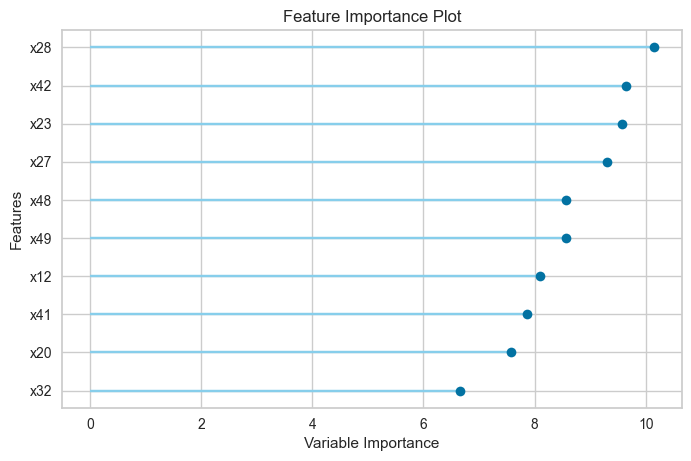

In [33]:
plot_model(best_model, plot='feature')

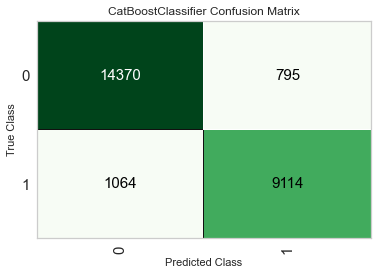

In [34]:
plot_model(best_model, plot = 'confusion_matrix')

### Retrains on entire train dataset

In [35]:
final_model_baseline = finalize_model(best_model)

### Check final performance

In [36]:
unseen_predictions = predict_model(final_model_baseline, data=test)
unseen_predictions.head()

,x0,x1,x3,x4,x5,x7,x8,x9,x10,x11,...,x43,x44,x45,x46,x47,x48,x49,y,Label,Score
0,-0.226706,11.350364,5.182092,-2.236454,10.716248,-15.900329,-0.178002,10.901306,-0.090170,-6.062488,...,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0,0,0.9981
1,-0.333224,1.138614,0.104432,0.819080,6.936425,37.988706,4.517952,17.467962,6.692915,-21.920142,...,1.938380,-5.395413,0.459957,-77.491333,0.754309,-0.442017,-21.824215,1,1,0.5266
2,-0.479265,-1.085311,5.535042,-5.157181,-1.608268,-33.507600,26.144811,-1.866048,3.351425,-3.272850,...,-0.984782,1.954579,0.383549,-1.467533,13.830803,-2.831817,9.343167,0,0,0.9887
3,0.140972,-13.770815,1.282171,-10.314443,-2.140678,-32.697867,-12.569104,-0.510527,-0.622231,-9.892130,...,1.088224,-2.185282,-0.230979,21.335008,-1.517562,-0.445338,9.285682,0,0,0.5788
4,0.466752,10.563190,2.027941,2.226414,17.927492,34.170205,-0.316748,8.300755,21.643071,9.464095,...,0.065431,1.069949,0.827266,-0.006643,-7.881300,-1.019437,7.875589,0,1,0.6360


In [37]:
# from pycaret.utils import check_metric
# check_metric(unseen_predictions['y'], unseen_predictions['Label'], metric = 'fp10_fn500')
np.round(fp10_fn500_func(y_test=unseen_predictions['Label'], y_pred=unseen_predictions['y']),2)

15.8

### Tune Best Model

#### XGBoost

In [38]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fp10_fn500
0,0.9237,0.9753,0.8919,0.9159,0.9037,0.8405,0.8407,22.0360
1,0.9192,0.9733,0.8847,0.9115,0.8979,0.8311,0.8313,23.4880
2,0.9210,0.9735,0.8895,0.9117,0.9005,0.8351,0.8352,22.5271
Mean,0.9213,0.9740,0.8887,0.9130,0.9007,0.8356,0.8358,22.6837
SD,0.0018,0.0009,0.0030,0.0020,0.0024,0.0039,0.0038,0.6030


In [ ]:
# ?tune_model

In [68]:
# https://pycaret.org/tune-model/

# tuned_xgboost = tune_model(xgboost)  # Severely Overfits on completely unseen dataset
# tuned_xgboost = tune_model(xgboost, search_library='scikit-optimize') # Severely Overfits on completely unseen dataset

# tune hyperparameters with custom_grid
# Min Child Weight increased to reduce overfitting
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

params = {
    "min_child_weight": np.random.randint(5, 10, 10)    
}
tuned_xgboost = tune_model(xgboost, custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fp10_fn500
0,0.9255,0.9758,0.8931,0.9190,0.9059,0.8442,0.8444,21.7863
1,0.9204,0.9738,0.8890,0.9106,0.8997,0.8337,0.8338,22.6354
2,0.9188,0.9729,0.8873,0.9084,0.8977,0.8304,0.8305,22.9991
Mean,0.9215,0.9742,0.8898,0.9127,0.9011,0.8361,0.8363,22.4736
SD,0.0028,0.0012,0.0024,0.0046,0.0035,0.0059,0.0059,0.5082


In [69]:
xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [70]:
tuned_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [71]:
# plot_model(tuned_xgboost, plot='feature')

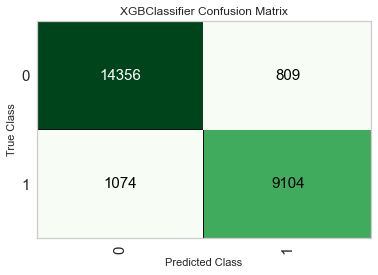

In [72]:
plot_model(tuned_xgboost, plot = 'confusion_matrix')

In [73]:
final_model_tuned = finalize_model(tuned_xgboost)

In [74]:
unseen_predictions = predict_model(final_model_tuned, data=test)
unseen_predictions.head()

,x0,x1,x3,x4,x5,x7,x8,x9,x10,x11,...,x43,x44,x45,x46,x47,x48,x49,y,Label,Score
0,-0.226706,11.350364,5.182092,-2.236454,10.716248,-15.900329,-0.178002,10.901306,-0.090170,-6.062488,...,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0,0,0.9991
1,-0.333224,1.138614,0.104432,0.819080,6.936425,37.988706,4.517952,17.467962,6.692915,-21.920142,...,1.938380,-5.395413,0.459957,-77.491333,0.754309,-0.442017,-21.824215,1,0,0.5813
2,-0.479265,-1.085311,5.535042,-5.157181,-1.608268,-33.507600,26.144811,-1.866048,3.351425,-3.272850,...,-0.984782,1.954579,0.383549,-1.467533,13.830803,-2.831817,9.343167,0,0,0.9909
3,0.140972,-13.770815,1.282171,-10.314443,-2.140678,-32.697867,-12.569104,-0.510527,-0.622231,-9.892130,...,1.088224,-2.185282,-0.230979,21.335008,-1.517562,-0.445338,9.285682,0,0,0.8603
4,0.466752,10.563190,2.027941,2.226414,17.927492,34.170205,-0.316748,8.300755,21.643071,9.464095,...,0.065431,1.069949,0.827266,-0.006643,-7.881300,-1.019437,7.875589,0,1,0.5041


In [75]:
np.round(fp10_fn500_func(y_test=unseen_predictions['Label'], y_pred=unseen_predictions['y']),2)

17.42

#### Catboost

In [47]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fp10_fn500
0,0.9280,0.9768,0.8968,0.9218,0.9091,0.8495,0.8497,21.0213
1,0.9251,0.9759,0.8929,0.9183,0.9054,0.8434,0.8436,21.8343
2,0.9235,0.9751,0.8927,0.9148,0.9036,0.8403,0.8404,21.8787
Mean,0.9255,0.9759,0.8941,0.9183,0.9061,0.8444,0.8446,21.5781
SD,0.0019,0.0007,0.0019,0.0028,0.0023,0.0039,0.0039,0.3941


In [58]:
# https://pycaret.org/tune-model/
# https://github.com/pycaret/pycaret/releases

tuned_catboost = tune_model(catboost, search_library='scikit-optimize')

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:02:05
Status,. . . . . . . . . . . . . . . . . .,Creating Logs
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,fp10_fn500


ValueError: Dimension has to be a list or tuple.

In [49]:
catboost.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 6,
 'border_count': 32,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,
 'add_ridge_penalty_to_loss_function': False,
 'loss_function': 'Logloss',
 'learning_rate': 0.026148

In [50]:
tuned_catboost.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Logloss',
 'iterations': 120,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 6,
 'random_strength': 0.30000001192092896,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 42,
 'depth': 8,
 'border_count': 32,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,
 'add_ridge_penalty_to_loss_function': False,
 'loss_function': 'Logloss',
 'learnin

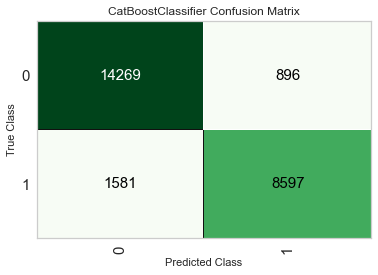

In [51]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

In [52]:
final_model_tuned = finalize_model(tuned_catboost)

In [53]:
unseen_predictions = predict_model(final_model_tuned, data=test)
unseen_predictions.head()

,x0,x1,x3,x4,x5,x7,x8,x9,x10,x11,...,x43,x44,x45,x46,x47,x48,x49,y,Label,Score
0,-0.226706,11.350364,5.182092,-2.236454,10.716248,-15.900329,-0.178002,10.901306,-0.090170,-6.062488,...,-2.064860,0.923879,0.331452,19.172365,5.752749,-2.609553,-20.320179,0,0,0.9835
1,-0.333224,1.138614,0.104432,0.819080,6.936425,37.988706,4.517952,17.467962,6.692915,-21.920142,...,1.938380,-5.395413,0.459957,-77.491333,0.754309,-0.442017,-21.824215,1,1,0.5005
2,-0.479265,-1.085311,5.535042,-5.157181,-1.608268,-33.507600,26.144811,-1.866048,3.351425,-3.272850,...,-0.984782,1.954579,0.383549,-1.467533,13.830803,-2.831817,9.343167,0,0,0.9371
3,0.140972,-13.770815,1.282171,-10.314443,-2.140678,-32.697867,-12.569104,-0.510527,-0.622231,-9.892130,...,1.088224,-2.185282,-0.230979,21.335008,-1.517562,-0.445338,9.285682,0,1,0.5257
4,0.466752,10.563190,2.027941,2.226414,17.927492,34.170205,-0.316748,8.300755,21.643071,9.464095,...,0.065431,1.069949,0.827266,-0.006643,-7.881300,-1.019437,7.875589,0,1,0.5803


In [55]:
np.round(fp10_fn500_func(y_test=unseen_predictions['Label'], y_pred=unseen_predictions['y']),2)

18.05

## Conclusions

* Default setting seems to be doing the best, although performing a grid search seems to get close enough results. 
* The grid search for xgboost had to limit the min_leaf_weight to a higher value to prevent overfiting in the model.